# ~ PoC AI Pool 2025 ~
- ## Day 3: Deep Learning
    - ### Module 3: My_torch
-----------

## My_torch

### Utils-Methode

After having a little introduction to the PyTorch library, we will now implement some of the methods in the library, with the objective of understanding how they work, how they are implemented and finally getting a better understanding of the library.

### Let's Start

First things first, we will implement easy methods such as ReLU, LeakyReLU, and Sigmoid.

Then we will implement the class MyLinear, which is a simple linear (technically, affine) transformation, and the class BatchNorm2d, which is a simple batch normalization.

Finally, we will implement the class MyConv2d, which is a simple 2D convolution, and the class ConvTranspose2d, which is a simple 2D transposed convolution.

In [1]:
import torch as t
import torch.nn as nn
from typing import Tuple, Union, List
import torchvision.transforms as transforms
from PIL import Image


IntOrPair = Union[int, Tuple[int, int]]
Pair = Tuple[int, int]

t1 = t.tensor([-1, -2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=t.float32)
t2 = t.tensor([10, 9, 8, 7, 6, 5, 4, 3, 2, 1], dtype=t.float32)

def force_pair(v: IntOrPair) -> Pair:
    if isinstance(v, tuple):
        if len(v) != 2:
            raise ValueError(v)
        return int(v[0]), int(v[1])
    elif isinstance(v, int):
        return (v, v)
    raise ValueError(v)
image = Image.new('RGB', (256, 256), (255, 255, 255))
transform = transforms.ToTensor()
tensor_image = transform(image)
tensor_image = tensor_image.unsqueeze(0)
weights = t.tensor([[[[1, 0, -1], [1, 0, -1], [1, 0, -1]], [[1, 0, -1], [1, 0, -1], [1, 0, -1]], [[1, 0, -1], [1, 0, -1], [1, 0, -1]]]], dtype=t.float32)

## ReLU
The fonction ReLu looks like this :

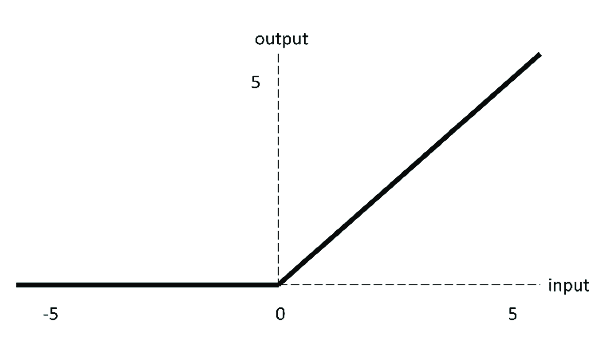

The principe of ReLU is to return the maximum between 0 and the input value. Why ? Because in AI, we want 3 things, the first one is to have a non-linear function, and the second one is to prevent the vanishing gradient problem(when the gradient is too small, the network doesn't learn anything), and the last one is to have more efficient computation.

To have more information about ReLU and it's implementation, you can check this [link](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html)


In [2]:
#TODO: implement a ReLU fonction
def ReLU(x : t.Tensor) -> t.Tensor:
    ...
assert ReLU(t1).equal(t.tensor([0, 0, 3, 4, 5, 6, 7, 8, 9, 10])), "Error in ReLU"

## LeakyReLU
The fonction LeakyReLU looks like this :

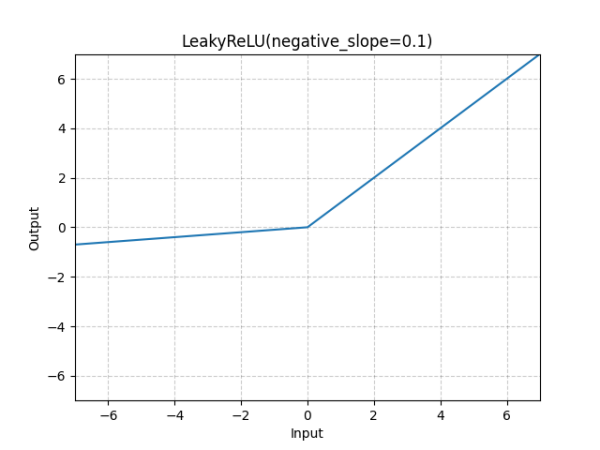

The principe of LeakyReLU is to return the maximum between 0 and the input value, but with a small slope for the negative values. Why ? Because here, we want to be sure that neurons won't die (a dead neuron is a neuron that always returns the same value, and so it doesn't learn anything) and we want to use the benefits of the ReLU function and at the same time, we want to learn a bit from the negative values.

To have more information about ReLU and it's implementation, you can check this [link](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html)


In [3]:
# TODO: implement a LeakyReLU fonction
def MyLeakyReLU(x : t.Tensor, negative_slope : float = 0.01) -> t.Tensor:
    ...
assert MyLeakyReLU(t1).equal(t.tensor([-0.01, -0.02, 3, 4, 5, 6, 7, 8, 9, 10])), "Error in LeakyReLU"

## Sigmoid
The fonction Sigmoid looks like this (if you forget):

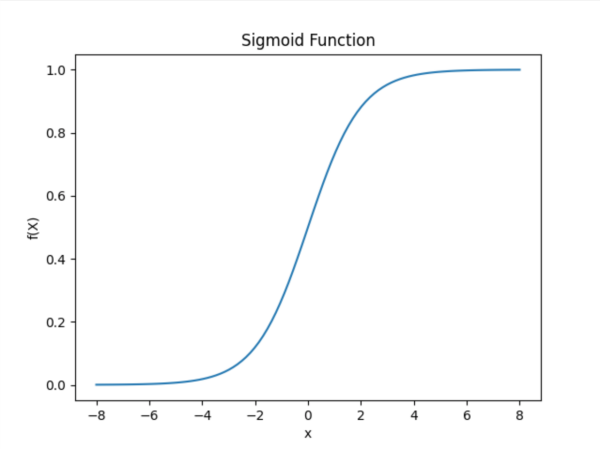

The principe of Sigmoid is to return a value between 0 and 1 to transform the input value into a probability and to stabilize the output of the network.

To have more information about Sigmoid and it's implementation, you can check this [link](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html)

In [4]:
#TODO: implement a Sigmoid fonction
def MySigmoid(x : t.Tensor) -> t.Tensor:
    ...
assert MySigmoid(t1).round(decimals=4).equal(t.tensor([0.2689, 0.1192, 0.9526, 0.9820, 0.9933, 0.9975, 0.9991, 0.9997, 0.9999, 1.0000])), "Error in Sigmoid"

## Tanh
The fonction Tanh looks like this :

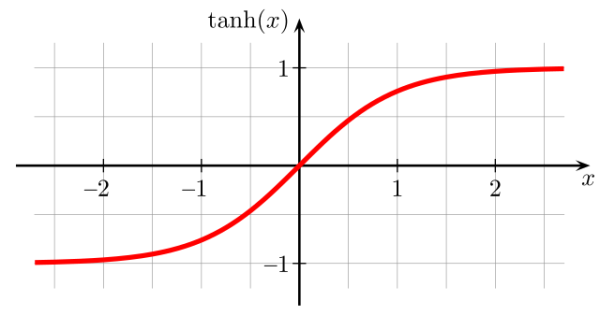

The principe of Tanh is to return a value between -1 and 1 it's has the same propriety as the Sigmoid function but with a range between -1 and 1.

To have more information about Tanh and it's implementation, you can check this [link](https://pytorch.org/docs/stable/generated/torch.nn.Tanh.html)

In [5]:
#TODO: implement a Tanh fonction
def Tanh(x : t.Tensor) -> t.Tensor:
    ...
assert Tanh(t1).round(decimals=4).equal(t.tensor([-0.7616, -0.9640, 0.9951, 0.9993, 0.9999, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])), "Error in Tanh"

## MyLinear
The class MyLinear is a simple linear (technically, affine) transformation.

It's a useful tool to modulate the simple relation between input and output characteristic.

Here you will need a bit more help :
the in_features are the dimensions of the entry vector

the out_features are the dimensions of the return vector.

the bias is the b that we add in the form of y = w . x + b where w is the weight and x is the input.

In that exercise you will just have to implement the forward method. and you have to use the einsum method from PyTorch. and to be sure that the bias is added only if it's not None.

In [7]:
class MyLinear(nn.Module):
    def __init__(self, in_features: int, out_features: int, bias=True):
        super().__init__()
        # set all the parameters
        
        ...
        
        
        bound = in_features**-0.5
        self.weight = nn.parameter.Parameter(t.empty(..., ...).uniform_(-bound, bound))
        if bias:
            self.bias = nn.parameter.Parameter(t.empty(...).uniform_(-bound, bound))
        else:
            self.bias = None

    # The forward method is the same as the torch.nn.Linear
    def forward(self, x: t.Tensor) -> t.Tensor:
        pass

    def extra_repr(self) -> str:
        return f"in_features={self.in_features}, out_features={self.out_features}, bias={self.bias is not None}"

linear = MyLinear(3, 3)
tensor = t.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]], dtype=t.float32)
t.manual_seed(0)
assert linear(tensor).round(decimals=4).equal(t.tensor([[-0.6577, -0.5797,  0.6369], [-1.1670, -2.0570,  1.8222], [-1.6764, -3.5343,  3.0075]])), "Error in MyLinear"

## Conv2d
The class Conv2d is a convolution in 2 dimensions. It's an essential tool for an AI model to learn be able to treat images, you should already know it with the CNN model that you made this morning ^^.

Here we will do 2 things, first of all we will work on myConv2d, who is a function that make the convolution, and then we will create the class convolution, who implement that class.

the padding and the stride are a bit tricky, basically, the padding is the number of pixels that we add to the input image (around the image to make the calculs), and the stride is the number of pixels that we add to make the convolution.

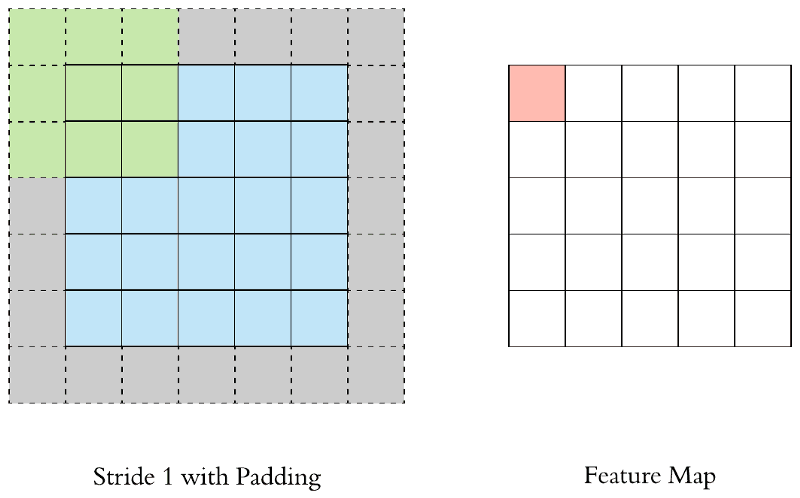

Here the padding is in grey, the kernel is in green, and the image is in blue. If we only use the kernel, we will have a smaller image, and so we add some pixels around the image to have the same size of the input image for the output.
 
for more info go to check this [link](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html)

In [ ]:
def myConv2d(x : t.Tensor, weights : t.Tensor, stride : IntOrPair, padding : IntOrPair) -> t.Tensor:
    # Get the stride and the padding as a pair
    padding_height, padding_width = ...

    # Get the dimensions of the input x and the weights
    ...
    # create the output height and output width using the formula : output = (input + 2 * padding - kernel) / stride + 1 
    ...
    # create a tensor with the size of the output and fill it with 0 ask for some help if you need
    out = ...
    # create a strided tensor from the input tensor it's a way that I recommend to do it, it's not the only one
    out[... , # don't replace the ...
        padding_height : padding_height + ... , # replace the ... by the correct varriable
        padding_width : padding_width + ... ] = x # replace the ... by the correct varriable
    
    # create the conv_size and the conv_stride
    conv_size = ...
    # hint 
    batch_stride, in_chanel_stride, image_height_stride, image_width_stride = out.stride()
    conv_stride = ...
    strided_x = t.as_strided(out, size=conv_size, stride=conv_stride)

    # and then you have to return the result of the convolution through the einsum method if you want an hint, continue to read
    # the strided_x is a tensor with the shape (batch, out_height, out_width, in_channel, kernel_height, kernel_width)
    # the weights is a tensor with the shape (out_channel, in_channel, kernel_height, kernel_width)
    # the result is a tensor with the shape (batch, out_channel, out_height, out_width)
    return ...

assert myConv2d(tensor_image, weights, 1, 1).shape == (1, 1, 256, 256), "Error in myConv2d"

## extra_repr

The extra_repr method is a method that is used to print the parameters of the class, it's a useful tool to have a better understanding of the class and to debug it.

Ignore it if you don't understand it is not relevant for the exercise, but if you want to understand it, you can check this [link](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.extra_repr)

In [ ]:
def extra_repr(module, arg_names: List[str], kwarg_names: List[str]) -> str:
        reprs = [repr(getattr(module, arg_name)) for arg_name in arg_names] + [
            f"{k}={getattr(module, k)}" for k in kwarg_names
        ]
        return ", ".join(reprs)

## MyConv2d

Here you will have to implement the class MyConv2d, who is a simple 2D convolution, but ad a class.

In [ ]:
class MyConv2d(t.nn.Module):
    def __init__(
        self,
        in_channels: int,
        out_channels: int,
        kernel_size: IntOrPair,
        stride: IntOrPair = 1,
        padding: IntOrPair = 0,
    ):
    
        super().__init__()
        # set all the parameters

        in_features = ...
        bound = in_features**-0.5
        self.weight = nn.parameter.Parameter(
            t.empty((out_channels, in_channels, *self.kernel_size)).uniform_(-bound, bound)
        )

    # The forward method is the same as the myConv2d function
    def forward(self, x: t.Tensor) -> t.Tensor:
        pass
    def extra_repr(self) -> str:
        return extra_repr(self, ["in_channels", "out_channels"], ["kernel_size", "stride"])
    
assert MyConv2d(3, 3, 3, 1, 1)(tensor_image).shape == nn.Conv2d(3, 3, 3, 1, 1)(tensor_image).shape, "Error in MyConv2d"

---
Well done guys you are a master of torch ! gg wp

You can know try to implement a model with your version of torch :) 